# Проект для интернет-магазина «Стримчик»

В нашем распоряжении данные о продажах игр, оценки пользователей и экспертов, жанры и платформы на декабрь 2016 года. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — выявить определяющие успешность игры закономерности, что поможет отпределить потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

## Просмотр и обработка датасета

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.duplicated().sum() #проверим датасет на дубликаты

0

In [5]:
games.columns = games.columns.str.lower() #приводим название столбцов к нижнему регистру

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**В информации о датасете заметил, что 'name' содержит пропуски, нужно их посмотреть для принятия решения заполнить/удалить/оставить**

In [6]:
display(games[games['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Видно что практически вся информация по этим играм отсутствует, поэтому можно их удалить**

In [7]:
games = games.dropna(subset=['name'])

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
#посмотрим процент пропусков в 'year_of_release'
percent = 100 / games['name'].count() * (games['name'].count() - games['year_of_release'].count()) 
print('Пропусков в столбце', 'year_of_release',':', percent,'%' )

Пропусков в столбце year_of_release : 1.6095255190570215 %


**Видим что пропусков в столбце всего 1.6%, поэтому данные строки можно исключить, т.к. они никак не повлияют на дальнейший анализ, но работать будет проще**

In [10]:
games = games.dropna(subset=['year_of_release'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [11]:
games['year_of_release'] = games['year_of_release'].astype(int) 
#преобразуем столбец с годом релиза в тип int. т.к. год целое число

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


**Заполнять пропуски не вижу смылса, т.к. заполнение 'critic_score' и 'user_score' средним/медианой исказит результаты корреляционного анализа и стат-тестов, аналогично и с 'rating'**

**Причиной пропусков могло быть: ошибка ввода данных, сокрытие информации, человеческий фактор, некоректный запрос.**

In [13]:
display(games[games['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


**В 'user_score' есть значение 'tbd', что означает "подлежит уточнению". Скорее всего для выставления рейтинга пользователей слишком мало оценок у данных игр, поэтому для упрощения понимания дальнейшего анализа датасета 'tbd' можно заменить на пропуски 'NaN'**

In [14]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [16]:
games['user_score'] = games['user_score'].astype(float)

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [18]:
#Комментарий студента
games['rating'] = games['rating'].fillna('без рейтинга') #сделаем заглушку в столбце с рейтингом

In [19]:
#добавим новый столбец с общим количеством продаж
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [20]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,без рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,без рейтинга,31.38


## Исследовательский анализ данных

Text(0.5, 1.0, 'Кол-во релизов в год')

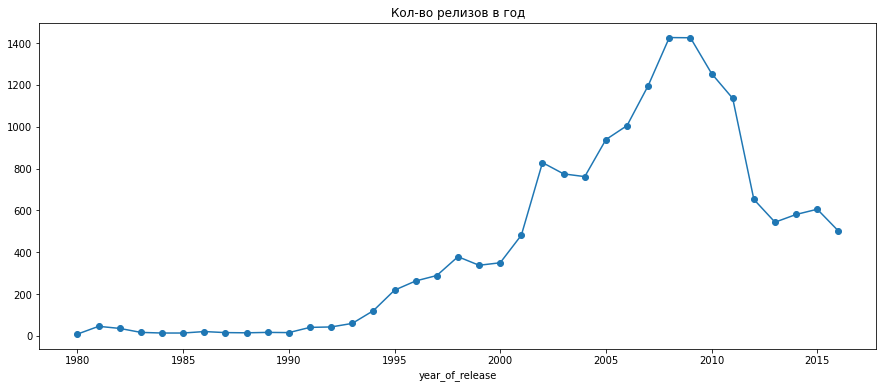

In [22]:
#посмотрим количество релизов по годам
display(games.groupby('year_of_release')['name'].count().plot(style='o-', figsize=(15, 6)).set_title('Кол-во релизов в год'))

**Самым богатым на релизы был период с 2006 по 2011. После 2011 года идет резкое падение, практически в 2 раза.**

Text(0.5, 1.0, 'Кол-во релизов на платформе')

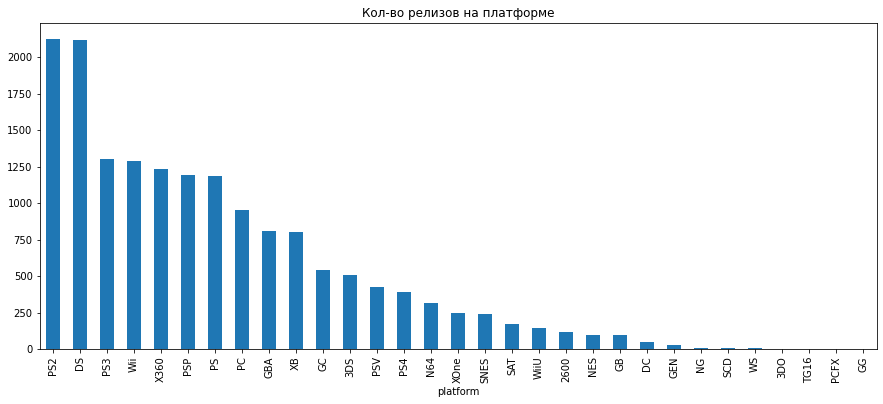

In [23]:
display(
    games.groupby('platform')['name'].count().sort_values(ascending=False)
    .plot(kind='bar', figsize=(15, 6)).set_title('Кол-во релизов на платформе')
)

<AxesSubplot:xlabel='year_of_release'>

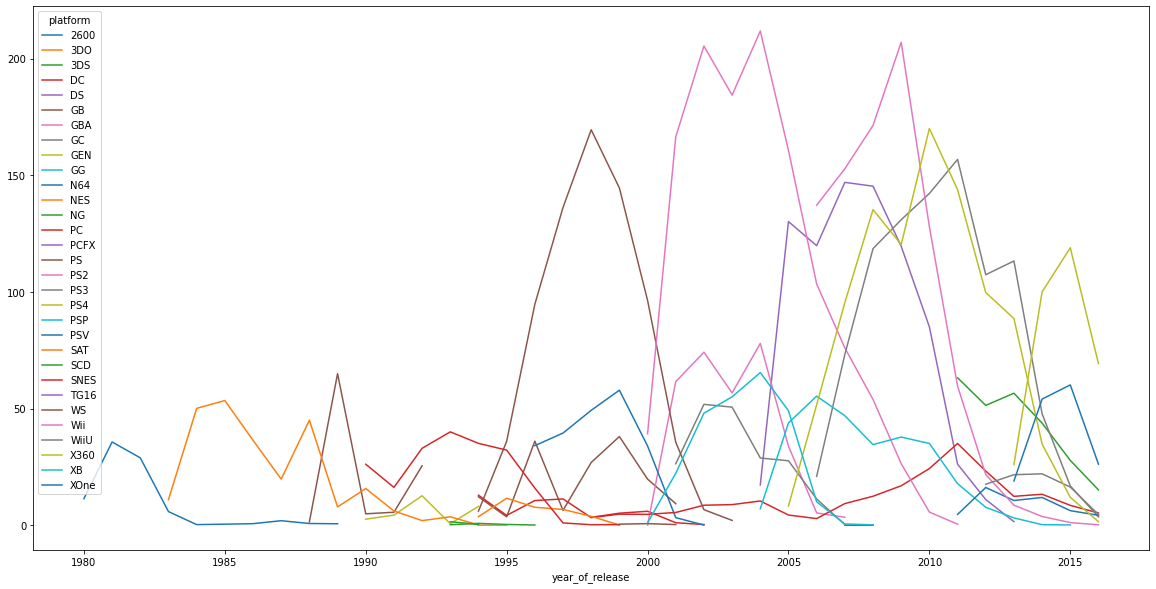

In [24]:
games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(20, 10))

**Для анализа возьмем последние 5 лет, т.е. период с 2012 по 2016 года. Большинство платформ уже не выпускаются и игр на них не выходить и учет их в анализе может сильно исказить вывод**

<AxesSubplot:xlabel='year_of_release'>

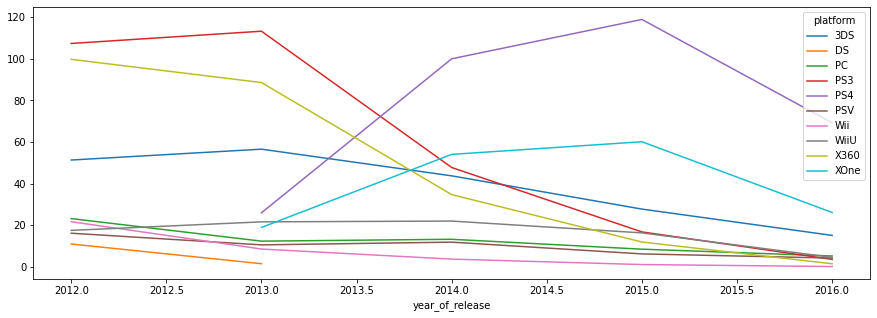

In [55]:
period_years = games.query('year_of_release >= 2012')
top_platforms_sales = period_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

top_platforms_pivot = (
    period_years.query('platform in @top_platforms_sales')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

top_platforms_pivot.plot(figsize=(15, 5))


Text(0.5, 1.0, 'Глобальные продажи по платформам')

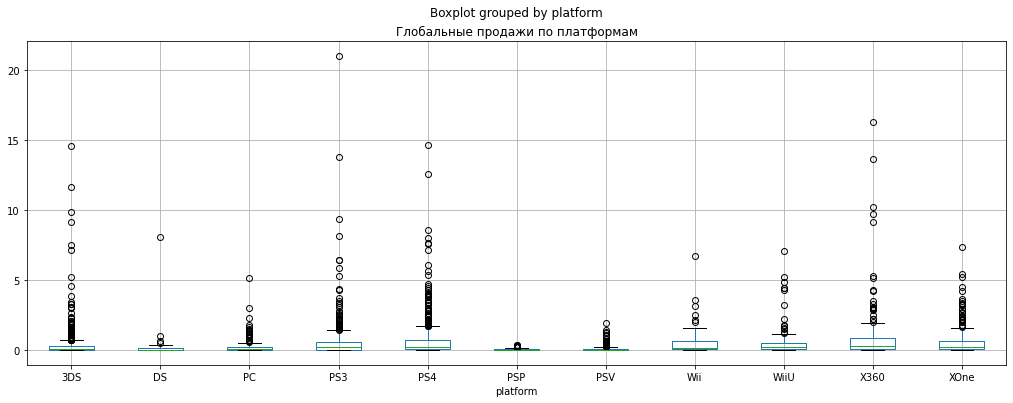

In [26]:
period_years.boxplot(column='total_sales', by='platform', figsize=(17,6)).set_title('Глобальные продажи по платформам')

(-0.3, 2.0)

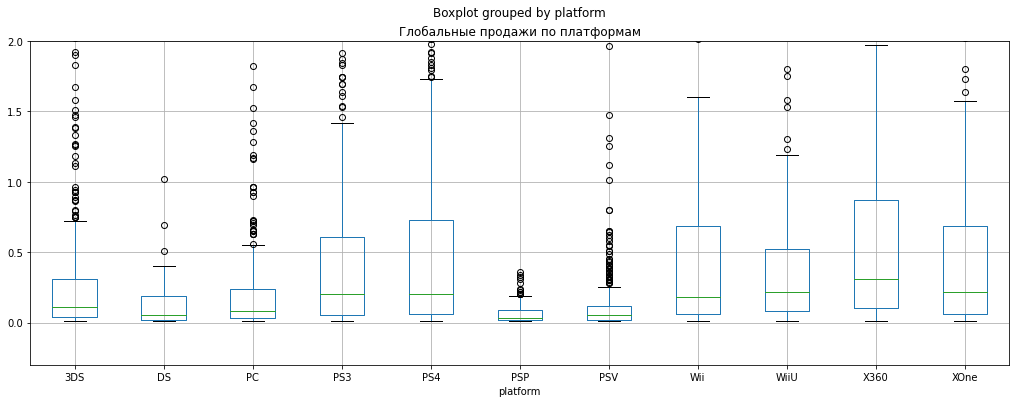

In [27]:
period_years.boxplot(column='total_sales', by='platform', figsize=(17,6)).set_title('Глобальные продажи по платформам')
plt.ylim(-0.3, 2) #посмотри поближе боксплоты

**Предварительно, самыми интересными платформами считаю PS4, Xbox One, 3DS и PC. Хоть продаж у PS3 и Xbox  360 выше, чем на других платформах, но срок их жизни подошел к концу, с выходом следующего поколения приставок**

**Посмотрим зависимость продаж от оценок критиков и игроков на Playstation 4**

Корреляция между оценками критиков и продажами: 0.40656790206178095


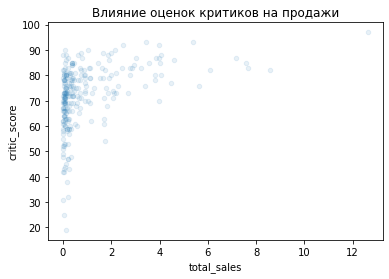

In [28]:
#создадим датасет с топовыми платформами за период с 2012 по 2016
top_platforms = period_years.query('platform in @top_platforms_sales')

ps4_corr = top_platforms[top_platforms['platform'] == 'PS4'] #выделим игры только с PS4

ps4_corr.plot(x='total_sales', y='critic_score', kind='scatter',  alpha=0.1).set_title('Влияние оценок критиков на продажи')
print('Корреляция между оценками критиков и продажами:', ps4_corr['critic_score'].corr(ps4_corr['total_sales']))

Корреляция между оценками игроков и продажами: -0.031957110204556376


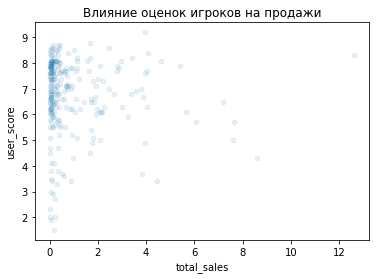

In [29]:
ps4_corr.plot(x='total_sales', y='user_score', kind='scatter',  alpha=0.1).set_title('Влияние оценок игроков на продажи')
print('Корреляция между оценками игроков и продажами:', ps4_corr['user_score'].corr(ps4_corr['total_sales']))

Корреляция между оценками игроков и продажами на X360 0.0061639786462133256
Корреляция между оценками игроков и продажами на 3DS 0.19758263411038596
Корреляция между оценками игроков и продажами на XOne -0.06892505328279412
Корреляция между оценками игроков и продажами на WiiU 0.4002190202148617
Корреляция между оценками игроков и продажами на PC -0.12186747630735577
Корреляция между оценками игроков и продажами на PSV -0.004339437514314869


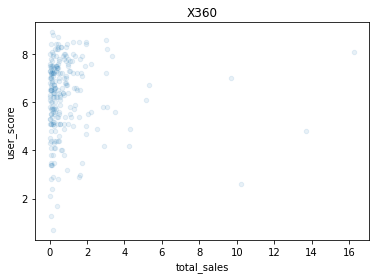

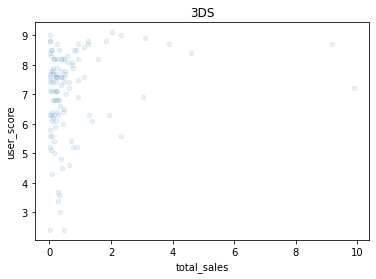

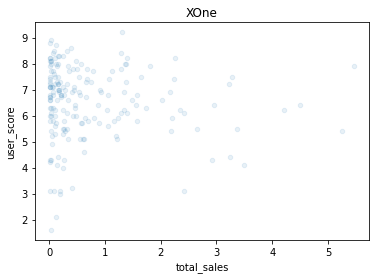

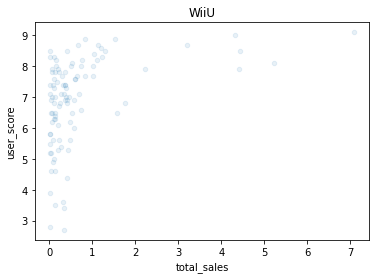

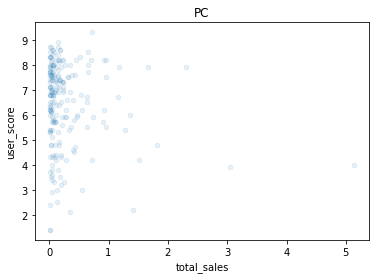

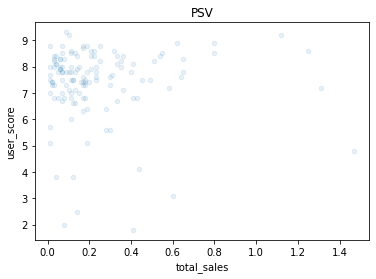

In [30]:
platform_few = ['X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']

for t in platform_few:
    top_platforms[top_platforms['platform'] == t].plot(x='total_sales', y='user_score', kind='scatter',  alpha=0.1, title=t)
    current = top_platforms.query('platform == @t')
    print('Корреляция между оценками игроков и продажами на', t, current['total_sales'].corr(current['user_score']))

Корреляция между оценками критиков и продажами на X360 0.36057348885073365
Корреляция между оценками критиков и продажами на 3DS 0.32080286953607845
Корреляция между оценками критиков и продажами на XOne 0.41699832800840175
Корреляция между оценками критиков и продажами на WiiU 0.3483797601201749
Корреляция между оценками критиков и продажами на PC 0.23724324311567918
Корреляция между оценками критиков и продажами на PSV 0.09448789929316172


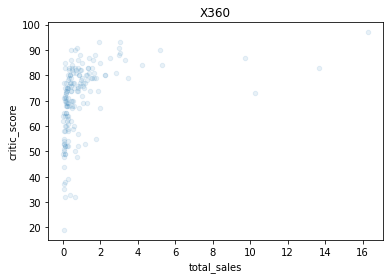

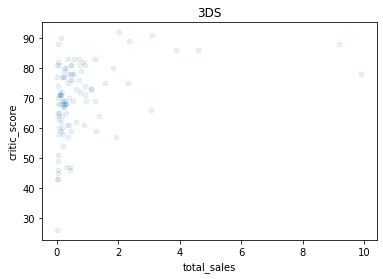

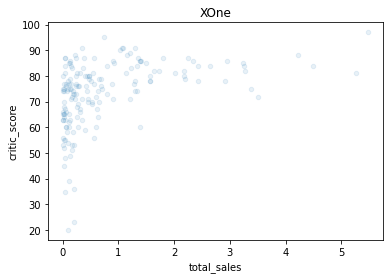

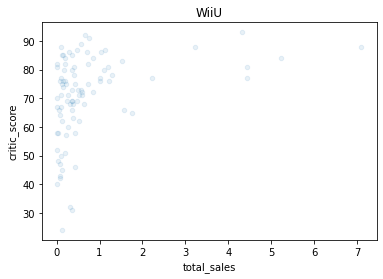

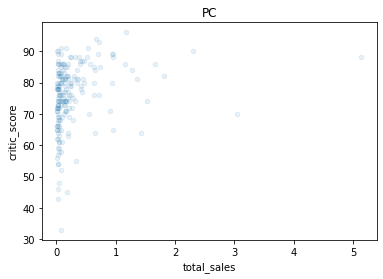

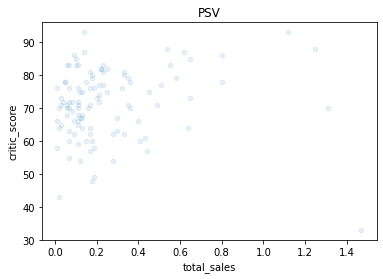

In [31]:
for t in platform_few:
    top_platforms[top_platforms['platform'] == t].plot(x='total_sales', y='critic_score', kind='scatter',  alpha=0.1, title=t)
    current = top_platforms.query('platform == @t')
    print('Корреляция между оценками критиков и продажами на', t, current['total_sales'].corr(current['critic_score']))

**Посмотрим распредение продаж и количества наименований по жанрам**

In [32]:
sales_genres = period_years.groupby('genre')['name'].count()
display(sales_genres.sort_values(ascending=False))

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: name, dtype: int64

In [33]:
sales_genres = period_years.groupby('genre')['total_sales'].sum()
display(sales_genres.sort_values(ascending=False))

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

**Самые популярные жанры у игроков Action, Shooter, Role-Playing, Sports, что можно увидеть из группировок выше. Action самый выпускаемый жанр, больше более чем в 2 раза выходило тайтлов с этим жанром в сравнении с ближайшим жанром Role-Playing. В кол-ве продаж Action так же впереди, но вот на втором месте уже Shooter. Из чего можно сделать вывод, что игроков интересуют игры с сюжетом, а если еще они приправлены красивыми спецэффектами, то эту игру точно купят**

In [34]:
sales_genres_median = period_years.groupby('genre')['total_sales'].median()
display(sales_genres_median.sort_values(ascending=False))

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

Text(0.5, 1.0, 'Медиана продаж по жанрам')

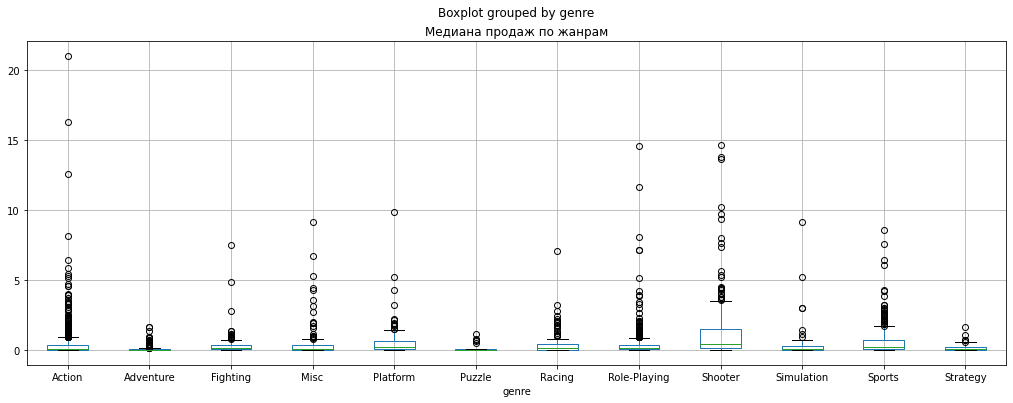

In [35]:
period_years.boxplot(column='total_sales', by='genre', figsize=(17,6)).set_title('Медиана продаж по жанрам')
#plt.ylim(-0.3, 2) #посмотри поближе боксплоты

(-0.3, 4.0)

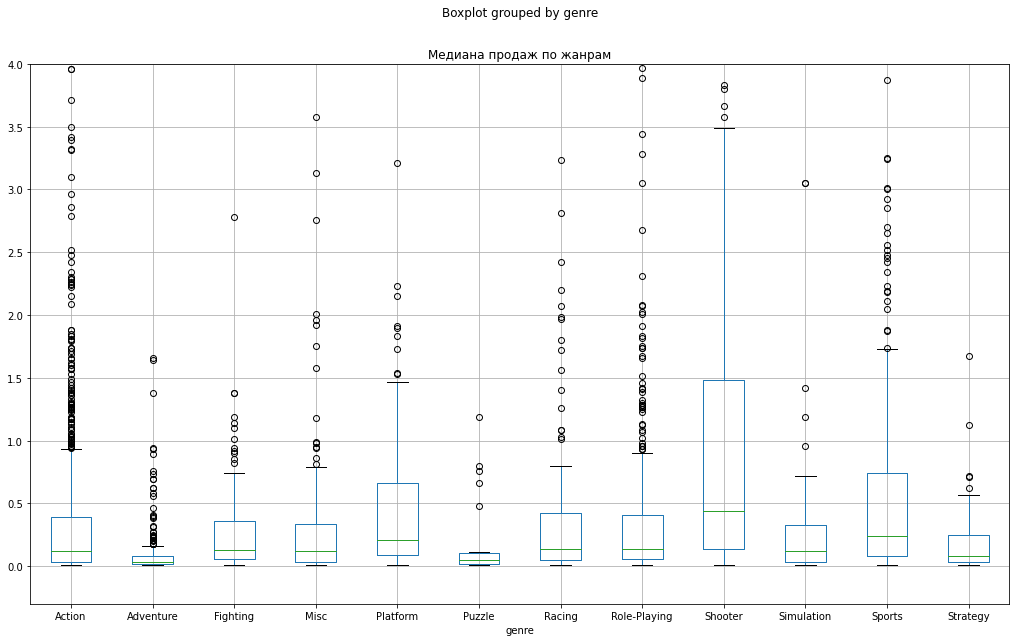

In [36]:
period_years.boxplot(column='total_sales', by='genre', figsize=(17,10)).set_title('Медиана продаж по жанрам')
plt.ylim(-0.3, 4) #посмотри поближе боксплоты

**Из диаграммы размаха видно, что шутеры, спорт и платформеры одни из самых прибыльных жанров.**

In [37]:
display(top_platforms[top_platforms['genre'] == 'Misc'].head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,без рейтинга,9.18
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+,6.76
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,без рейтинга,5.27
248,Nintendo Land,WiiU,2012,Misc,2.52,1.11,0.46,0.33,77.0,7.9,E10+,4.42
261,Minecraft,PS4,2014,Misc,1.48,2.02,0.14,0.68,NaN,NaN,без рейтинга,4.32
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,3.58
439,Mario Party 9,Wii,2012,Misc,1.06,1.09,0.76,0.22,73.0,6.8,E,3.13
543,Minecraft,XOne,2014,Misc,1.61,0.90,0.00,0.25,NaN,NaN,без рейтинга,2.76
850,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.00,0.17,NaN,8.4,E10+,2.01
868,Minecraft,PSV,2014,Misc,0.18,0.64,0.90,0.24,NaN,NaN,без рейтинга,1.96


**В списке видно жанр Misc (англ. "разное"), данный жанр включает в себя игры, которые не относятся к, так сказать, "основным" жанрам. В нем могуть быть игры с музыкальной направленностью (серия Just Dance). Еще есть, так называемые, песочницы, где игрок представлен сам себе, может ходить куда хочет, может строить/рушить, например Minecraft**

## ПОРТРЕТ ИГРОКА

**Посмотрим как выглядит игрок в разных частях света: Европа, Япония и Северная Америка**

**Сначала посмотрим на ТОП 5 платформ**

Text(0.5, 1.0, 'ТОП 5 платформ игроков в Европе')

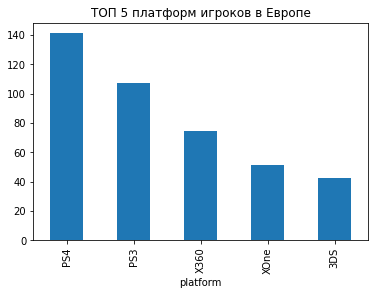

In [38]:
(
    period_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
    .plot(kind='bar').set_title('ТОП 5 платформ игроков в Европе')
)

Text(0.5, 1.0, 'ТОП 5 платформ игроков в Японии')

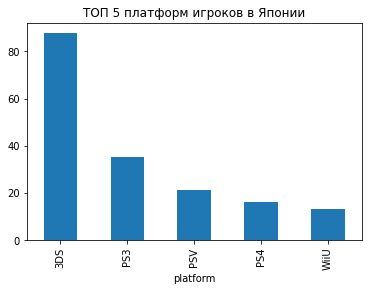

In [39]:
(
    period_years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
    .plot(kind='bar').set_title('ТОП 5 платформ игроков в Японии')
)

Text(0.5, 1.0, 'ТОП 5 платформ игроков в Северной Америке')

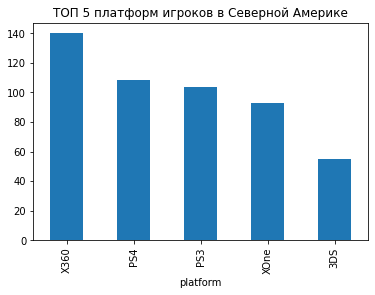

In [40]:
(
    period_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
    .plot(kind='bar').set_title('ТОП 5 платформ игроков в Северной Америке')
)

**В каждом регионе свой лидер:**
- **в Европе у большинства игроков системы Playstation будь то 3 или 4 версия приставки, не очень дела у 3DS и PC в сумме их меньше чем Xbox 360, который находится на третьем месте по популярности;**
- **в Японии поддерживают отечественного производителя, т.к. все 5 мест занимают платформы произведенные в стране "восходящего солнца". На первом месте с большим отрывом идет 3DS на неё приходится половина от всех продаж ТОП 5 платофрм в Японии;**
- **в Северной Америке так же стараются поддерживать отечественного производителя, т.к. Xbox 360 самая популярная приставка у игроков. Но и Playstation не отстает.**

**Взглянем на ТОП 5 жанров, которые предпочитают игроки**

Text(0.5, 1.0, 'ТОП 5 жанров игроков в Европе')

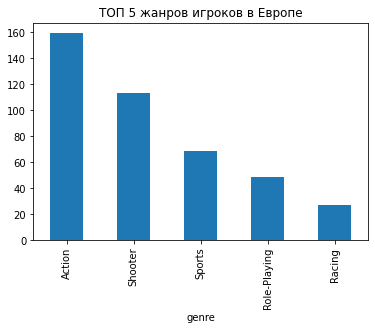

In [41]:
(
    period_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
    .plot(kind='bar').set_title('ТОП 5 жанров игроков в Европе')
)

Text(0.5, 1.0, 'ТОП 5 жанров игроков в Японии')

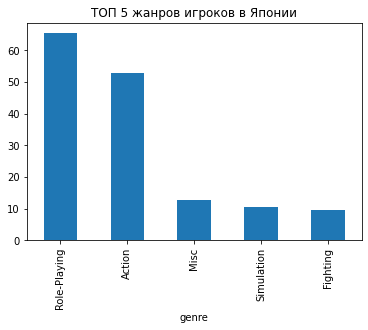

In [42]:
(
    period_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
    .plot(kind='bar').set_title('ТОП 5 жанров игроков в Японии')
)

Text(0.5, 1.0, 'ТОП 5 жанров игроков в Северной Америке')

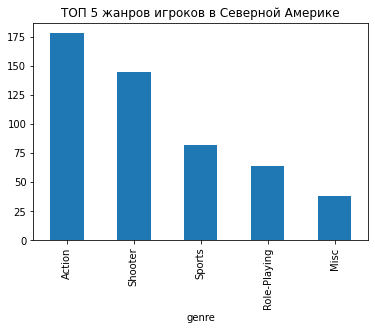

In [43]:
(
    period_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
    .plot(kind='bar').set_title('ТОП 5 жанров игроков в Северной Америке')
)

- **Игроки в Европе и Северной Америке очень похожи, первые 4 места отданы экшену, шутерам/стрелялкам, спортивным играм и рпг. Но все же в Европе еще любят гонки, а в Америке жанр "Misc", который включает в себя множество других жанров, которые нельзя отнести к "основным" жанрам**
- **Японские игроки отличаются от европейских и американских игроков. В Японии хоть основное предпочтение отдают жанрам рпг и экшену, но вот менее популярные жанры, так же попавшие в ТОП 5, это "разное" и платформеры и замыкает пятерку жанров шутеры**

**Влияние рейтинга на продажи в регионах**

Рейтинг:
E    — Для всех возрастов,
EC   — 3+,
E10+ — 10+,
T    — 13+,
M    — 17+,
RP   — Рейтинг ожидается


Text(0.5, 1.0, 'Влияние рейтинга на продажи в Европе')

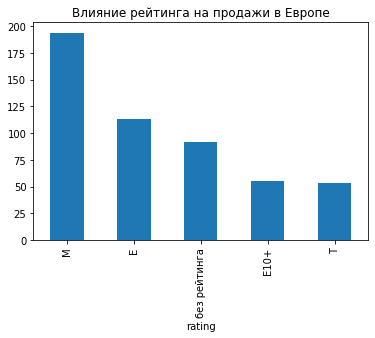

In [44]:
print(
    '''Рейтинг:
E    — Для всех возрастов,
EC   — 3+,
E10+ — 10+,
T    — 13+,
M    — 17+,
RP   — Рейтинг ожидается'''
)

(
    period_years.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
    .plot(kind='bar').set_title('Влияние рейтинга на продажи в Европе')
)

Рейтинг:
E    — Для всех возрастов,
EC   — 3+,
E10+ — 10+,
T    — 13+,
M    — 17+,
RP   — Рейтинг ожидается


Text(0.5, 1.0, 'Влияние рейтинга на продажи в Японии')

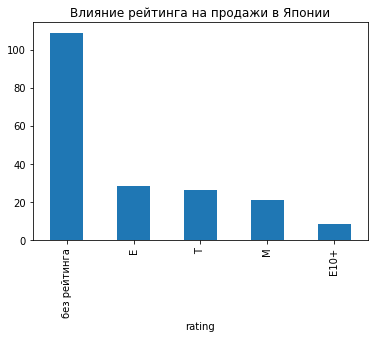

In [45]:
print(
    '''Рейтинг:
E    — Для всех возрастов,
EC   — 3+,
E10+ — 10+,
T    — 13+,
M    — 17+,
RP   — Рейтинг ожидается'''
)

(
    period_years.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
    .plot(kind='bar').set_title('Влияние рейтинга на продажи в Японии')
)

In [46]:
#узнаем популярные жанры на 3DS
jp = period_years[period_years['platform'] == '3DS']
display(jp.groupby('genre')['platform'].count().sort_values(ascending=False))

genre
Action          156
Role-Playing     79
Misc             41
Adventure        33
Simulation       20
Platform         19
Puzzle           13
Sports           12
Strategy         11
Fighting          9
Shooter           2
Racing            1
Name: platform, dtype: int64

Рейтинг:
E    — Для всех возрастов,
EC   — 3+,
E10+ — 10+,
T    — 13+,
M    — 17+,
RP   — Рейтинг ожидается


Text(0.5, 1.0, 'Влияние рейтинга на продажи в Северной Америке')

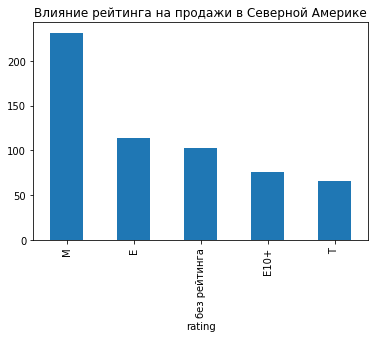

In [47]:
print(
    '''Рейтинг:
E    — Для всех возрастов,
EC   — 3+,
E10+ — 10+,
T    — 13+,
M    — 17+,
RP   — Рейтинг ожидается'''
)

(
    period_years.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
    .plot(kind='bar').set_title('Влияние рейтинга на продажи в Северной Америке')
)


- **Здесь как и с жанрами Европа и Америка предпочитает игры с одинаковыми рейтингами. Но выделяется рейтинг "М", оно и понятно, ведь экшен и шутеры в основном создаются для взрослой публики. Рейтинги "Т" и "Е" с другими производными тоже популярны, в них попадают гонки и спортивные игры. Интересно то, что довольно большая доля игр не имеет рейтинга, для рынка Европы это обьясняется тем, что рейтинг представлен агенством ESRB, рейтинги которого расчитаны на рынок США и Канады. А вот как в Северной Америке покупали игры без рейтинга не ясно**
- **В Японии в основном играют в игры с рейтингом "без рейтинга", причина в том, что представленный датасет имеет рейтинг ESRB, который предназначен для рынков США и Канады. На втором месте игры с рейтингом "Е" т.е. игры для всех возрастов, что было видно в ТОП платформ Японии, там преобладает приставка 3DS, в библиотеке которой перобладают игры жанров рпг, приключения и разное**

In [48]:
# Комментарий ревьюера
temp = period_years.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


без рейтинга    1275
M                498
T                412
E                395
E10+             306
Name: rating, dtype: int64

## Проверка гипотез

**Гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Рейтинг пользователей на Xbox One = рейтингу пользователей на PC
H_1: Рейтинг пользователей на Xbox One ≠ рейтингу пользователей на PC
```

In [49]:
xbox_rating = period_years.loc[period_years['platform'] == 'XOne', 'user_score'].dropna()
pc_rating = period_years.loc[period_years['platform'] == 'PC', 'user_score'].dropna()

results = st.ttest_ind (xbox_rating, 
                        pc_rating,
                        equal_var=False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("He получилось отвергнуть нулевую гипотезу")

0.5489537965134912
He получилось отвергнуть нулевую гипотезу


In [50]:
xopc = period_years[(period_years['platform'] == 'XOne') | (period_years['platform'] == 'PC')].dropna()
xopc_mean = xopc.pivot_table(index = 'platform', values = 'user_score', aggfunc = 'mean')
xopc_mean.columns = ['Средний балл']
display(xopc_mean)

,Средний балл
platform,
PC,6.454315
XOne,6.538182


**Гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные

```
H_0: Рейтинг пользователей жанра Action = рейтингу пользователей жанра Sports
H_1: Рейтинг пользователей жанра Action ≠ рейтингу пользователей жанра Sports
```

In [51]:
action_rating = period_years.loc[period_years['genre'] == 'Action', 'user_score'].dropna()
sports_rating = period_years.loc[period_years['genre'] == 'Sports', 'user_score'].dropna()

results = st.ttest_ind (action_rating, 
                        sports_rating,
                        equal_var=False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("He получилось отвергнуть нулевую гипотезу")

4.24307776572644e-20
Отвергаем нулевую гипотезу


In [52]:
spoction = period_years[(period_years['genre'] == 'Action') | (period_years['genre'] == 'Sports')].dropna()
spoction_mean = spoction.pivot_table(index = 'genre', values = 'user_score', aggfunc = 'mean')
spoction_mean.columns = ['Средний балл']
display(spoction_mean)

,Средний балл
genre,
Action,6.899306
Sports,5.819858




- **Т.к. нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. То у нас получилось:**
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (Да, одинаковые)
    - Средние пользовательские рейтинги жанров Action и Sports разные (Разницы нет, рейтинги равны)
- **Задача стояла сравнить среднее, а так как мы сравниваем среднее двух генеральных совокупностей, то используется метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам**

## ВЫВОД 

**После проведенного анализа можно сделать следующие выводы:**
- Основной акцент рекламы в будущем году нужно перевести на несколько платформ: **PS4** - т.к. это приставка нового поколения, а значит кол-во игр и новых пользователей будет расти и **3DS** - очень популярная приставка в Японии и Европе;
- Самые прибыльные жанры **шутеры, спортивные и платформеры**, поэтому на них так же стоит акцентировать внимание;
- Игры с рейтингом **М(17+) и E(0+)**, так же нужно добавить рейтинги для других регионов, для более глубого анализа;
- Основными регионами выбрал бы Европу и Японию